In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
skin_dataset_path = '/content/drive/MyDrive/Skin_NonSkin.txt'
column_names = ['B', 'G', 'R', 'Skin']  # Menamai kolom berdasarkan RGB dan target
skin_data = pd.read_csv(skin_dataset_path, sep='\t', header=None, names=column_names)

# Perbaikan label target (mengubah kelas dari [1, 2] ke [0, 1])
skin_data['Skin'] = skin_data['Skin'] - 1  # Mengubah 1->0 dan 2->1

# Informasi dataset
skin_data.info()  # Menampilkan info tentang dataset
print("\nStatistik Deskriptif:")
print(skin_data.describe())  # Menampilkan statistik deskriptif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       245057 non-null  int64
 1   G       245057 non-null  int64
 2   R       245057 non-null  int64
 3   Skin    245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB

Statistik Deskriptif:
                   B              G              R           Skin
count  245057.000000  245057.000000  245057.000000  245057.000000
mean      125.065446     132.507327     123.177151       0.792461
std        62.255653      59.941197      72.562165       0.405546
min         0.000000       0.000000       0.000000       0.000000
25%        68.000000      87.000000      70.000000       1.000000
50%       139.000000     153.000000     128.000000       1.000000
75%       176.000000     177.000000     164.000000       1.000000
max       255.000000     255.000000     255.000000       1.000000


Output ini menggambarkan informasi struktur dan statistik deskriptif dari dataset dengan **245057 baris** dan **4 kolom**: `B`, `G`, `R` (komponen warna biru, hijau, dan merah), serta `Skin` (label klasifikasi). Semua kolom memiliki tipe data `int64` tanpa nilai yang hilang. Statistik deskriptif menunjukkan bahwa nilai warna (`B`, `G`, `R`) memiliki rentang antara 0 hingga 255, yang sesuai dengan intensitas warna pada skala RGB. Rata-rata intensitas warna biru, hijau, dan merah adalah 125.07, 132.51, dan 123.18, dengan standar deviasi masing-masing menunjukkan tingkat variasi data. Kolom `Skin` memiliki nilai rata-rata 0.792, yang berarti sekitar 79.2% dari data memiliki label `1` (kemungkinan mewakili "kulit"). Dataset ini tampaknya bersih dan siap untuk analisis lebih lanjut, seperti klasifikasi berdasarkan nilai warna RGB dan label `Skin`.

<ipython-input-3-95224426607f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skin_data['Skin'], palette="viridis")  # Membuat grafik batang untuk distribusi kelas


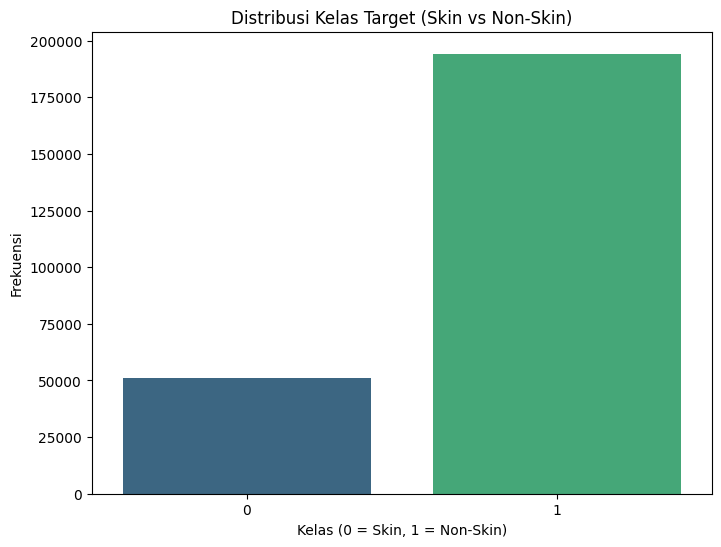

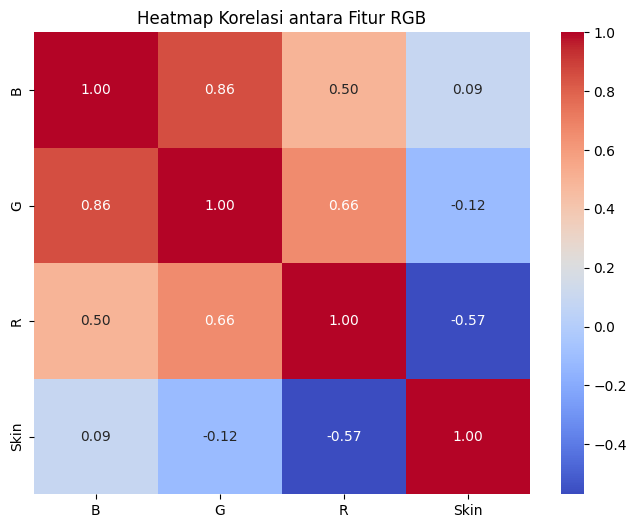

In [3]:
# Distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x=skin_data['Skin'], palette="viridis")  # Membuat grafik batang untuk distribusi kelas
plt.title('Distribusi Kelas Target (Skin vs Non-Skin)')
plt.xlabel('Kelas (0 = Skin, 1 = Non-Skin)')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antara fitur RGB
plt.figure(figsize=(8, 6))
sns.heatmap(skin_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap korelasi
plt.title('Heatmap Korelasi antara Fitur RGB')
plt.show()

Hasil output menunjukkan analisis distribusi kelas dan hubungan antar fitur dalam dataset. Grafik distribusi kelas menunjukkan bahwa label `Skin` (0 = Non-Skin, 1 = Skin) sangat tidak seimbang, dengan mayoritas data memiliki label `1` (kulit) dibandingkan label `0`. Ketidakseimbangan ini dapat memengaruhi performa model prediksi dan memerlukan teknik seperti oversampling atau undersampling.

Heatmap korelasi antar fitur menunjukkan bahwa komponen RGB (`B`, `G`, `R`) memiliki korelasi positif yang signifikan satu sama lain, misalnya, antara `B` dan `G` sebesar 0.86. Namun, korelasi antara fitur RGB dengan label `Skin` relatif rendah, seperti `R` memiliki korelasi negatif tertinggi sebesar -0.57. Hal ini menunjukkan bahwa meskipun ada hubungan antara nilai RGB dan label kulit, hubungan ini tidak terlalu kuat, sehingga model prediksi mungkin membutuhkan teknik yang lebih kompleks untuk memanfaatkan pola dalam data.

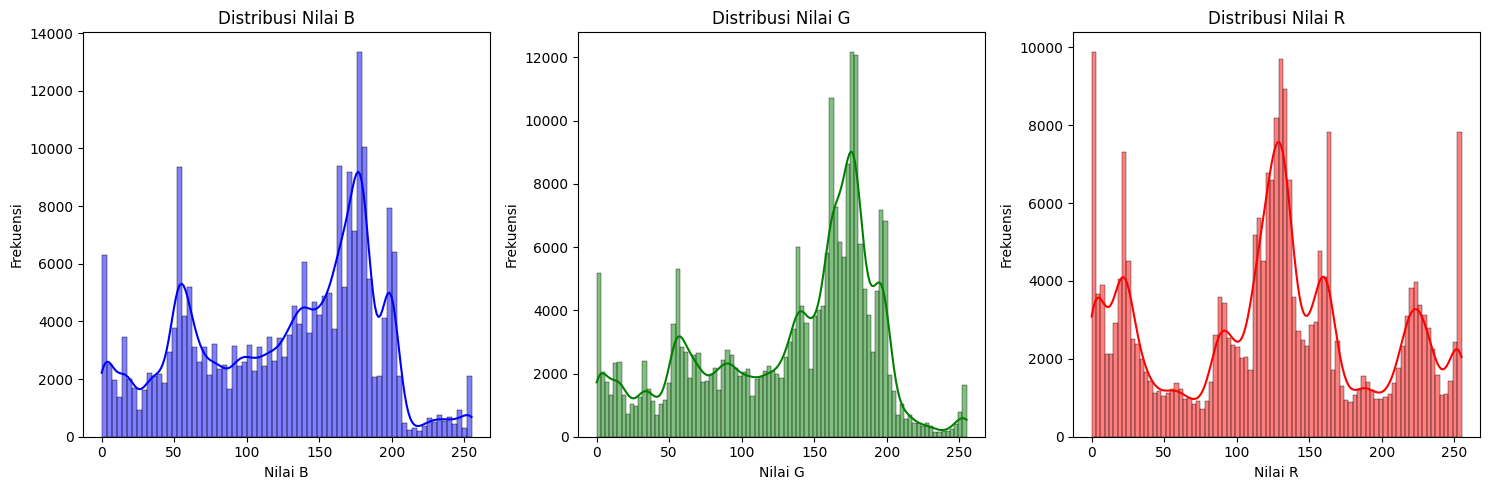

<ipython-input-4-70f72e6505b4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Skin', y=color, data=skin_data, palette='Set2')
<ipython-input-4-70f72e6505b4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Skin', y=color, data=skin_data, palette='Set2')
<ipython-input-4-70f72e6505b4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Skin', y=color, data=skin_data, palette='Set2')


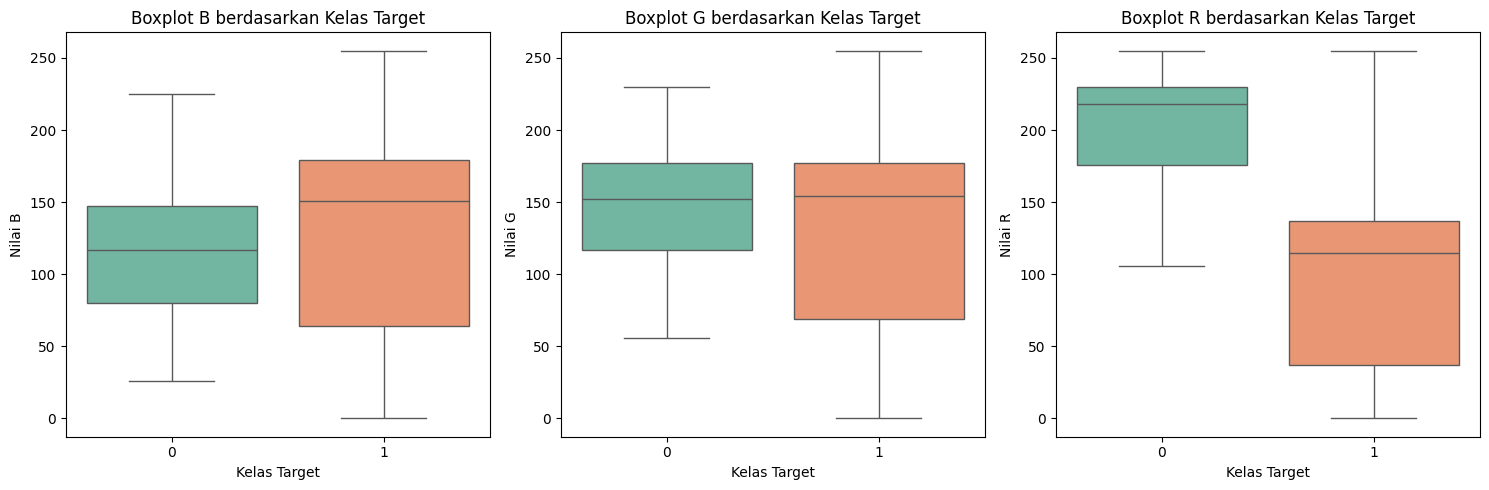

In [4]:
# Histogram distribusi nilai RGB
plt.figure(figsize=(15, 5))

for i, color in enumerate(['B', 'G', 'R'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(skin_data[color], kde=True, color=color.lower())
    plt.title(f'Distribusi Nilai {color}')
    plt.xlabel(f'Nilai {color}')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Boxplot nilai RGB berdasarkan kelas target
plt.figure(figsize=(15, 5))
for i, color in enumerate(['B', 'G', 'R'], start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Skin', y=color, data=skin_data, palette='Set2')
    plt.title(f'Boxplot {color} berdasarkan Kelas Target')
    plt.xlabel('Kelas Target')
    plt.ylabel(f'Nilai {color}')

plt.tight_layout()
plt.show()

Hasil output menunjukkan distribusi dan hubungan nilai RGB terhadap kelas target (`Skin`). Pada grafik distribusi, nilai RGB (`B`, `G`, `R`) memiliki pola distribusi multimodal, dengan puncak utama pada intensitas warna yang tinggi, terutama sekitar nilai 150-200. Hal ini menunjukkan bahwa data cenderung terpusat pada nilai warna yang lebih terang.

Pada grafik boxplot, nilai RGB dipisahkan berdasarkan kelas target (`0` = Non-Skin, `1` = Skin). Untuk semua komponen warna (`B`, `G`, `R`), terlihat bahwa nilai median dan distribusi data untuk kelas `1` (Skin) cenderung lebih tinggi dibandingkan kelas `0` (Non-Skin). Boxplot juga mengindikasikan adanya perbedaan yang cukup signifikan antara kedua kelas, terutama pada komponen warna merah (`R`), di mana distribusi nilai kelas `0` cenderung lebih tinggi dibandingkan kelas `1`. Analisis ini mengindikasikan bahwa pola intensitas warna RGB dapat digunakan untuk membedakan antara kulit dan non-kulit dalam dataset.

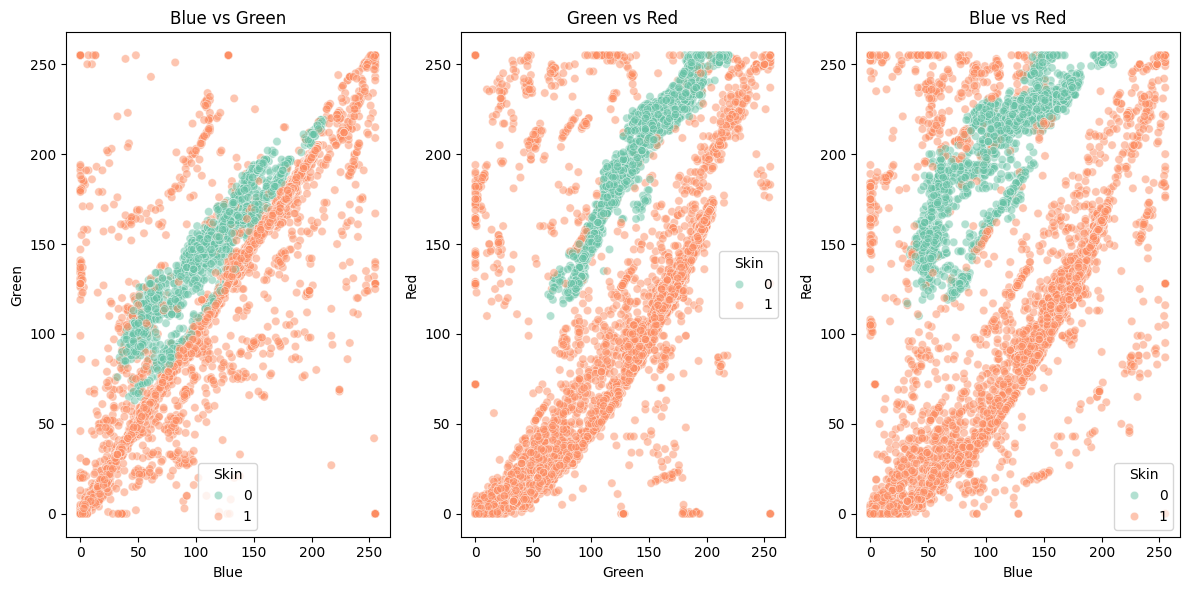

In [5]:
# Visualisasi hubungan RGB dengan kelas target (menggunakan sampel data untuk efisiensi)
sampled_data = skin_data.sample(10000, random_state=42)

plt.figure(figsize=(12, 6))

# Scatter plot: Blue vs Green
plt.subplot(1, 3, 1)
sns.scatterplot(data=sampled_data, x='B', y='G', hue='Skin', palette='Set2', alpha=0.5)
plt.title('Blue vs Green')
plt.xlabel('Blue')
plt.ylabel('Green')

# Scatter plot: Green vs Red
plt.subplot(1, 3, 2)
sns.scatterplot(data=sampled_data, x='G', y='R', hue='Skin', palette='Set2', alpha=0.5)
plt.title('Green vs Red')
plt.xlabel('Green')
plt.ylabel('Red')

# Scatter plot: Blue vs Red
plt.subplot(1, 3, 3)
sns.scatterplot(data=sampled_data, x='B', y='R', hue='Skin', palette='Set2', alpha=0.5)
plt.title('Blue vs Red')
plt.xlabel('Blue')
plt.ylabel('Red')

plt.tight_layout()
plt.show()

Hasil output ini menampilkan scatter plot hubungan antar nilai warna RGB (`Blue`, `Green`, `Red`) dalam dataset, dipisahkan berdasarkan kelas target (`Skin`, di mana 0 = Non-Skin dan 1 = Skin). Plot menunjukkan bahwa data dengan label `Skin = 1` (kulit) cenderung terdistribusi dalam pola yang lebih terkonsentrasi, sedangkan data dengan label `Skin = 0` (non-kulit) memiliki distribusi yang lebih menyebar. Pada hubungan antar warna (Blue vs Green, Green vs Red, Blue vs Red), terlihat bahwa data kelas kulit membentuk kelompok yang lebih spesifik di tengah rentang intensitas warna. Perbedaan pola ini menunjukkan bahwa hubungan antara nilai RGB dapat digunakan untuk membedakan antara kulit dan non-kulit, menjadikan fitur-fitur RGB relevan untuk model klasifikasi.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Memisahkan fitur dan target
X = skin_data[['B', 'G', 'R']]
y = skin_data['Skin']

# Membagi dataset menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat pipeline untuk model klasifikasi
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),
    "k-NN": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ]),
    "XGBoost": Pipeline([
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ])
}

Evaluasi Model Awal: Logistic Regression
Akurasi     : 0.9166
Presisi     : 0.9532
Recall      : 0.9410
F1-Score    : 0.9470
AUC-ROC     : 0.9484


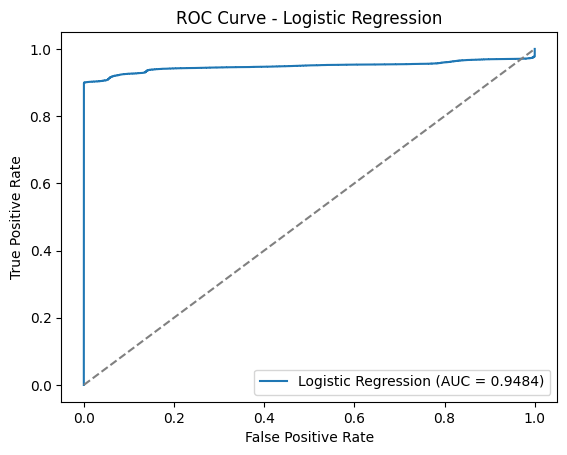

Evaluasi Model Awal: Decision Tree
Akurasi     : 0.9993
Presisi     : 0.9997
Recall      : 0.9993
F1-Score    : 0.9995
AUC-ROC     : 0.9992


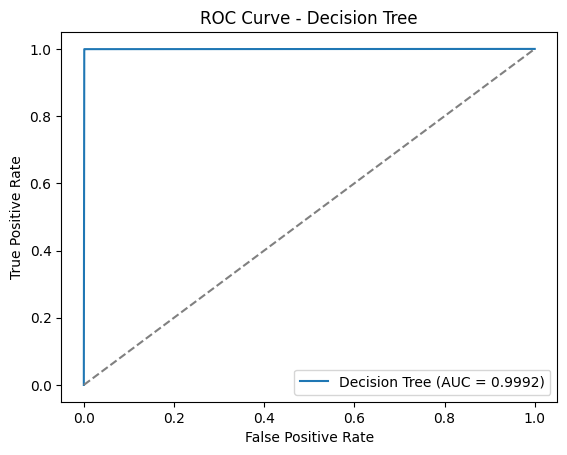

Evaluasi Model Awal: k-NN
Akurasi     : 0.9995
Presisi     : 0.9999
Recall      : 0.9994
F1-Score    : 0.9997
AUC-ROC     : 0.9997


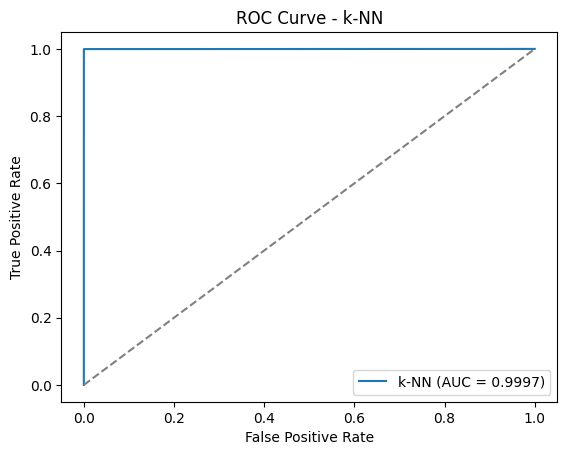

Evaluasi Model Awal: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Akurasi     : 0.9995
Presisi     : 0.9999
Recall      : 0.9994
F1-Score    : 0.9997
AUC-ROC     : 1.0000


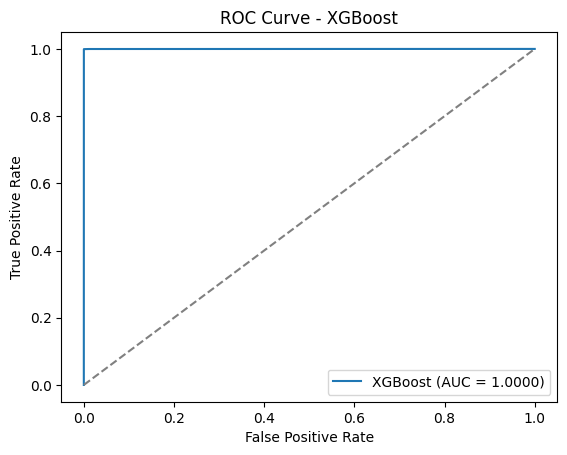


Hasil Evaluasi Awal:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.916612   0.953186  0.940989  0.947048  0.948386
1        Decision Tree  0.999265   0.999742  0.999331  0.999536  0.999174
2                 k-NN  0.999470   0.999948  0.999382  0.999665  0.999718
3              XGBoost  0.999470   0.999923  0.999408  0.999665  0.999982


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Melatih dan mengevaluasi setiap model
initial_evaluation = []

for name, pipeline in pipelines.items():
    print(f"Evaluasi Model Awal: {name}")

    # Melatih model
    pipeline.fit(X_train, y_train)

    # Prediksi
    y_pred = pipeline.predict(X_val)
    y_proba = pipeline.predict_proba(X_val)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else "N/A"

    # Menyimpan hasil evaluasi
    initial_evaluation.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

    # Menampilkan metrik
    print(f"Akurasi     : {accuracy:.4f}")
    print(f"Presisi     : {precision:.4f}")
    print(f"Recall      : {recall:.4f}")
    print(f"F1-Score    : {f1:.4f}")
    if auc != "N/A":
        print(f"AUC-ROC     : {auc:.4f}")

    # Plot ROC Curve jika probabilitas tersedia
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

# Menampilkan hasil evaluasi awal secara tabel
initial_evaluation_df = pd.DataFrame(initial_evaluation)
print("\nHasil Evaluasi Awal:")
print(initial_evaluation_df)

Hasil evaluasi ini membandingkan performa empat model klasifikasi berdasarkan metrik evaluasi utama: **Accuracy**, **Precision**, **Recall**, **F1-Score**, dan **AUC-ROC**.

1. **Logistic Regression**:
   - Akurasi sebesar **91.66%** menunjukkan model ini cukup baik dalam mengklasifikasikan data.
   - Precision (**95.32%**) dan Recall (**94.10%**) menunjukkan model cukup andal dalam mendeteksi kelas positif, dengan F1-Score sebesar **94.70%**, yang menyeimbangkan Precision dan Recall.
   - AUC-ROC sebesar **0.948** mengindikasikan kemampuan model dalam membedakan kelas cukup tinggi.

2. **Decision Tree**:
   - Memiliki akurasi sangat tinggi (**99.93%**) dengan Precision (**99.97%**) dan Recall (**99.93%**).
   - F1-Score sebesar **99.95%** menunjukkan model hampir sempurna, didukung oleh AUC-ROC **0.999**.
   - Akurasi yang sangat tinggi ini mengindikasikan kemungkinan overfitting, karena Decision Tree cenderung mempelajari detail data secara berlebihan.

3. **k-Nearest Neighbors (k-NN)**:
   - Akurasi (**99.95%**) sama tinggi dengan XGBoost, dengan Precision mencapai **99.99%** dan Recall **99.94%**.
   - F1-Score sebesar **99.97%** menunjukkan model mampu menangkap keseimbangan antara Precision dan Recall.
   - AUC-ROC sebesar **0.9997** menunjukkan kemampuan luar biasa dalam membedakan kelas.

4. **XGBoost**:
   - Sama seperti k-NN, XGBoost juga mencapai akurasi sangat tinggi (**99.95%**), dengan Precision (**99.99%**), Recall (**99.94%**), dan F1-Score (**99.97%**).
   - AUC-ROC tertinggi (**0.99998**) menunjukkan model ini paling unggul dalam membedakan kelas.

### Kesimpulan:
Semua model, kecuali Logistic Regression, menunjukkan performa hampir sempurna. **XGBoost** dan **k-NN** memiliki performa terbaik dengan akurasi, F1-Score, dan AUC-ROC tertinggi. Namun, akurasi yang terlalu tinggi pada Decision Tree, k-NN, dan XGBoost dapat mengindikasikan potensi **overfitting**, sehingga perlu evaluasi lebih lanjut menggunakan teknik validasi seperti cross-validation atau mengurangi kompleksitas model.

Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: Logistic Regression
Akurasi     : 0.9166
Presisi     : 0.9532
Recall      : 0.9410
F1-Score    : 0.9470
AUC-ROC     : 0.9483


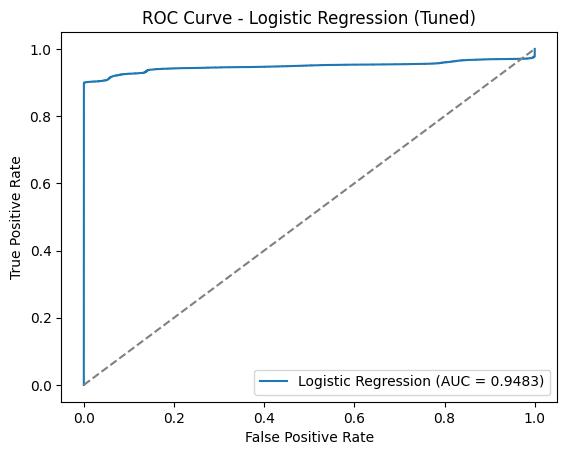

Tuning hyperparameters for Decision Tree...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: Decision Tree
Akurasi     : 0.9993
Presisi     : 0.9998
Recall      : 0.9993
F1-Score    : 0.9995
AUC-ROC     : 0.9993


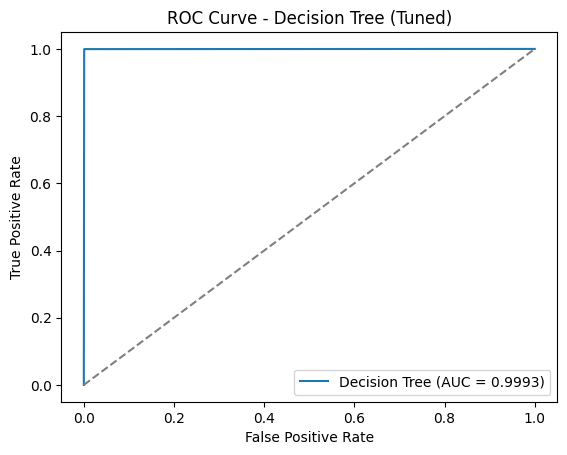

Tuning hyperparameters for k-NN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: k-NN
Akurasi     : 0.9995
Presisi     : 0.9999
Recall      : 0.9994
F1-Score    : 0.9997
AUC-ROC     : 0.9997


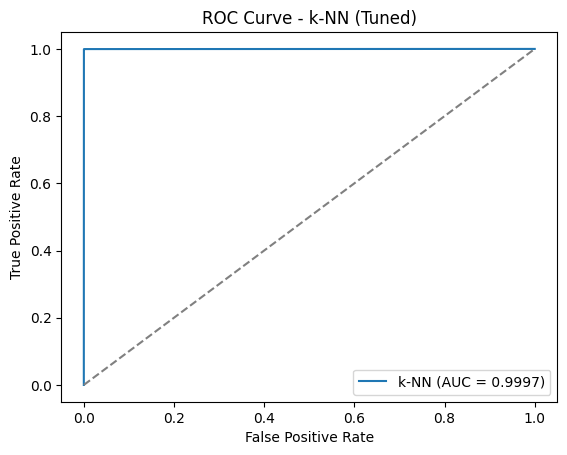

Tuning hyperparameters for XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Akurasi     : 0.9995
Presisi     : 0.9999
Recall      : 0.9995
F1-Score    : 0.9997
AUC-ROC     : 1.0000


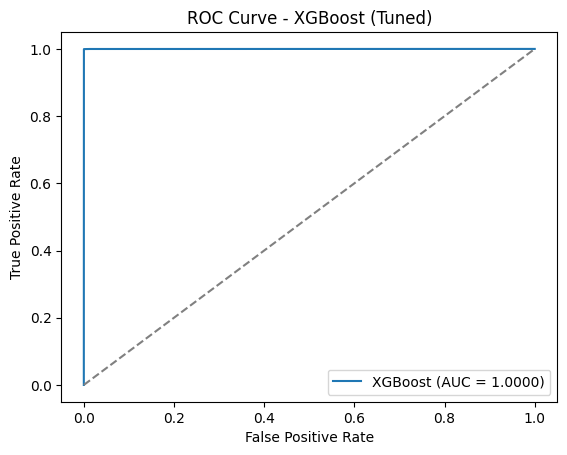


Hasil Evaluasi Setelah Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.916592   0.953184  0.940963  0.947034  0.948345
1        Decision Tree  0.999265   0.999768  0.999305  0.999536  0.999323
2                 k-NN  0.999490   0.999923  0.999434  0.999678  0.999670
3              XGBoost  0.999510   0.999897  0.999485  0.999691  0.999976


In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids untuk setiap model
param_grids = {
    "Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['lbfgs', 'liblinear']
    },
    "Decision Tree": {
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5]
    },
    "k-NN": {
        'clf__n_neighbors': [3, 5, 10],
        'clf__weights': ['uniform', 'distance']
    },
    "XGBoost": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [3, 5, 10],
        'clf__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Melakukan tuning hyperparameter
tuned_evaluation = []

for name, pipeline in pipelines.items():
    print(f"Tuning hyperparameters for {name}...")

    # Grid search
    grid_search = GridSearchCV(pipeline, param_grids[name], scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Prediksi ulang dengan model terbaik
    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else "N/A"

    # Menyimpan hasil evaluasi
    tuned_evaluation.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

    # Menampilkan metrik
    print(f"Model: {name}")
    print(f"Akurasi     : {accuracy:.4f}")
    print(f"Presisi     : {precision:.4f}")
    print(f"Recall      : {recall:.4f}")
    print(f"F1-Score    : {f1:.4f}")
    if auc != "N/A":
        print(f"AUC-ROC     : {auc:.4f}")

    # Plot ROC Curve jika probabilitas tersedia
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f"ROC Curve - {name} (Tuned)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

# Menampilkan hasil evaluasi setelah tuning secara tabel
tuned_evaluation_df = pd.DataFrame(tuned_evaluation)
print("\nHasil Evaluasi Setelah Hyperparameter Tuning:")
print(tuned_evaluation_df)

Hasil evaluasi setelah hyperparameter tuning menunjukkan performa empat model klasifikasi berdasarkan metrik utama. Berikut adalah penjelasannya:

1. **Logistic Regression**:
   - Akurasi tetap berada di **91.66%**, menunjukkan bahwa tuning tidak memberikan perubahan signifikan pada performa model.
   - Precision (**95.32%**), Recall (**94.10%**), dan F1-Score (**94.70%**) menunjukkan model cukup andal untuk mendeteksi kelas positif.
   - AUC-ROC sebesar **0.948** mengindikasikan kemampuan model dalam membedakan kelas tetap konsisten setelah tuning.

2. **Decision Tree**:
   - Akurasi tetap sangat tinggi (**99.93%**) dengan Precision meningkat sedikit menjadi **99.98%**, dan Recall tetap di **99.93%**.
   - F1-Score tetap di **99.95%**, menunjukkan model mampu menjaga keseimbangan antara Precision dan Recall.
   - AUC-ROC meningkat sedikit menjadi **0.9993**, tetapi tetap menunjukkan potensi **overfitting**, mengingat akurasi yang hampir sempurna.

3. **k-Nearest Neighbors (k-NN)**:
   - Akurasi meningkat sedikit menjadi **99.95%** setelah tuning, dengan Precision tetap sangat tinggi (**99.99%**) dan Recall meningkat ke **99.94%**.
   - F1-Score sebesar **99.97%** menunjukkan model sangat efektif dan seimbang.
   - AUC-ROC sebesar **0.9997** menunjukkan kemampuan model yang tetap sangat kuat dalam membedakan kelas.

4. **XGBoost**:
   - Model XGBoost mengalami sedikit peningkatan, dengan akurasi mencapai **99.95%**, Precision **99.99%**, dan Recall meningkat menjadi **99.95%**.
   - F1-Score sebesar **99.97%** menunjukkan performa yang konsisten dan sangat baik.
   - AUC-ROC tetap tinggi di **0.99998**, menunjukkan model ini tetap unggul dalam membedakan kelas.

### **Kesimpulan**:
Hyperparameter tuning menghasilkan sedikit peningkatan pada beberapa model, terutama **k-NN** dan **XGBoost**, yang kini menunjukkan performa terbaik dengan akurasi, F1-Score, dan AUC-ROC hampir sempurna. Sementara itu, Logistic Regression tidak mengalami peningkatan signifikan, dan Decision Tree tetap sangat akurat tetapi memiliki risiko **overfitting**. Secara keseluruhan, **XGBoost** menjadi pilihan terbaik berdasarkan hasil evaluasi setelah tuning.